# 1-) Dependent t-test for two samples

The dependent t-test (also called the paired t-test or paired-samples t-test) compares the means of two related groups to determine whether there is a statistically significant difference between these means.

**These are the prerequisites for appplying this test**
 * 1-)Both samples should have normal distribution
 * 2-) The distribution of variance of the two samples should be similar (variance homogeneity)

**Otherwise we cannot apply the Dependent t-test for two samples**

**Bussiness Application:** Measuring the impact of in-company training on performance.


**Target:** It is aimed to measure whether a training given to a company adds value to the company in a positive way. 


**Details:** Sales department is trained. Sales averages are measured before and after training. It is wanted to measure whether the training really has added value.  

**H0:** Before and after the training, the performance averages of the people who received training in the relevant field **are not** different.

**H1:** Before and after the training, the performance averages of the people who received training in the relevant field **are** different.    

In [2]:
## Sales Averages before traning===>>SABT
##Sales Averages after traning===>>SAAT
import pandas as pd
SABT = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

SAAT = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [3]:
SABT[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [4]:
SAAT[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [5]:
#DATA TYPE 1

In [7]:
SEPARATE = pd.concat([SABT, SAAT], axis = 1)
SEPARATE .columns = ["BEFORE","AFTER"]
SEPARATE.head()

,BEFORE,AFTER
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [8]:
# DATA TYPE 2

In [19]:
import numpy as np
GROUP_BEFORE = np.arange(len(SABT))
GRUP_BEFORE = pd.DataFrame(GROUP_BEFORE)
GRUP_BEFORE[:] = "Before"
B=pd.concat([SABT,GRUP_BEFORE ], axis = 1)
B.head()

,0,0
0,123,Before
1,119,Before
2,119,Before
3,116,Before
4,123,Before


In [21]:
GROUP_AFTER = np.arange(len(SAAT))
GRUP_AFTER = pd.DataFrame(GROUP_AFTER)
GRUP_AFTER[:] = "After"
A=pd.concat([SAAT,GRUP_AFTER ], axis = 1)
A.head()

,0,0
0,118,After
1,127,After
2,122,After
3,132,After
4,129,After


In [24]:
Together=pd.concat([B,A],axis=0)
Together

,0,0
0,123,Before
1,119,Before
2,119,Before
3,116,Before
4,123,Before
...,...,...
35,129,After
36,133,After
37,120,After
38,127,After


In [26]:
Together.columns=["Sales Avareges" ,"BEFORE_AFTER"]

In [27]:
Together

,Sales Avareges,BEFORE_AFTER
0,123,Before
1,119,Before
2,119,Before
3,116,Before
4,123,Before
...,...,...
35,129,After
36,133,After
37,120,After
38,127,After


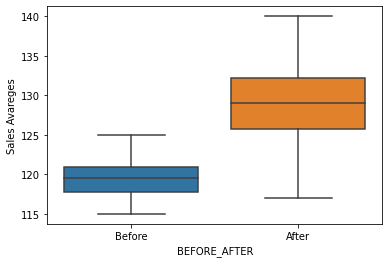

In [29]:
import seaborn as sns
sns.boxplot(x = "BEFORE_AFTER", y  ="Sales Avareges", data = Together);

In the graph above, it is seen that traning has added value. But we have to try to prove this statistically by rejecting or not rejecting hypotheses

## Checking the  prerequisites for appplying this test

1-)Both samples should have normal distribution

2-) The distribution of variance of the two samples should be similar (variance homogeneity)

### 1-)Normal distribution

**Shapiro-Wilks Test**

**HO:** There **is no** statistically significant difference between the sample distribution and the theoretical normal distribution.

**H1:** There **is** a statistically significant difference between the sample distribution and the theoretical normal distribution.

In [32]:
from scipy.stats import shapiro 

In [34]:
shapiro(SEPARATE.BEFORE)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

**pvalue=0.1072245**

* Since the sample p-value is not less than 0.05, we cannot reject the H0 hypothesis.


* The sales avarages before traning have normal distribution

In [35]:
shapiro(SEPARATE.AFTER)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

**pvalue=0.6159515**


* Since the sample p-value is not less than 0.05, we cannot reject the H0 hypothesis.


* The sales avarages after traning have normal distribution

### 2-)Variance homogeneity

**H0:** The variances of both samples **are** homogeneous


**H1:** The variances of both samples **are not** homogeneous

In [37]:
import scipy.stats as stats
stats.levene(SEPARATE["BEFORE"], SEPARATE["AFTER"])

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

**pvalue=0.0050844511**

* Since the sample p-value is  less than 0.05, we reject the H0 hypothesis.


* Thus the variances of both samples are not homogeneous

**Red Alert:** If variance homogeneity is not provided to this test, it may be ignored to some extent.
Hypothesis testing can be done as if variance homogeneity is provided.

## Hypothesis Test

**H0:** Before and after the training, the performance averages of the people who received training in the relevant field **are not** different.

**H1:** Before and after the training, the performance averages of the people who received training in the relevant field **are** different. 

In [39]:
stats.ttest_rel(SEPARATE["BEFORE"], SEPARATE["AFTER"])

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [40]:
test_statistics, pvalue = stats.ttest_rel(SEPARATE["BEFORE"], SEPARATE["AFTER"])
print('Test Statistics = %.5f, p-value = %.5f' % (test_statistics, pvalue))

Test Statistics = -9.28153, p-value = 0.00000


**p-value = 0.00000**

* H0 hypothesis is rejected because the p-value is less than 0.05.


* **H1:** Before and after the training, the performance averages of the people who received training in the relevant field **are** different.
    

* That is, the training given at work has added an performance on sales avareges.  

# 2-)Non-Parametric Dependent t-test for paired samples 

* If the normal distribution and variance homogeneity as prerequisites **are not satisfied**, we should apply Non-Parametric Dependent t-test for paired samples.

In [41]:
stats.wilcoxon(SEPARATE["BEFORE"], SEPARATE["AFTER"])

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [42]:
test_statistics, pvalue = stats.wilcoxon(SEPARATE["BEFORE"], SEPARATE["AFTER"])
print('Test Statistics = %.5f, p-value = %.5f' % (test_statistics, pvalue))

Test Statistics = 15.00000, p-value = 0.00000
